<a href="https://colab.research.google.com/github/LeoSousaJesus/Projetos-faculdade/blob/main/Aula_02_AnaliseDados_Preparacao_PredicaoPrecoVeiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predição de preço de veículos

O preço de um carro depende de muitos fatores como a marca do carro, características do carro, potência, quilometragem rodada e muito mais.
A previsão de preços de carros é uma das principais áreas de pesquisa em aprendizado de máquina.
Nesta tarefa, vamos treinar um modelo de aprendizado de máquina que preverá o preço dos carros usando os recursos fornecidos do carro.

#bit.ly/aula_2_ad


#1. Importar as Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Obter os Dados

In [ ]:
url = 'https://raw.githubusercontent.com/betotorres/datasets/main/ds_preco_veiculos.csv'
df = pd.read_csv(url, sep=',')
df.head(2)

,carro_id,seguranca,nome_carro,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,localizacao_motor,distancia_entre_ eixos,...,tamanho_motor,sistema_combustivel,diametro_cilindro,distancia_pistao,taxa_compressao,potencia,rpm_max,rpm_cidade,rpm_estrada,preco
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


#3. Entender os Dados

##3.1. Checar as dimensões
- linhas x colunas

In [ ]:
df.shape

(205, 26)

In [ ]:
df['teste'] = None

##3.2. Observar as informações básicas do conjunto de dados


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carro_id                205 non-null    int64  
 1   seguranca               205 non-null    int64  
 2   nome_carro              205 non-null    object 
 3   tipo_combustivel        205 non-null    object 
 4   aspiracao               205 non-null    object 
 5   numero_portas           205 non-null    object 
 6   carroceria              205 non-null    object 
 7   tracao                  205 non-null    object 
 8   localizacao_motor       205 non-null    object 
 9   distancia_entre_ eixos  205 non-null    float64
 10  comprimento_veiculo     205 non-null    float64
 11  largura_veiculo         205 non-null    float64
 12  altura_veiculo          205 non-null    float64
 13  peso_veiculo            205 non-null    int64  
 14  tipo_motor              205 non-null    ob

In [ ]:
df = df.drop(columns=['teste'])

**Observações**
- Dos dados, se observam 10 atributos categóricos e 16 atributos numéricos.
- Todos os dados estão corretamente tipados, de modo que não será necessário fazer qualquer ajuste neste aspecto.

##3.3. Estatística Descritiva dos Dados Numéricos

In [ ]:
df.describe()

,carro_id,seguranca,distancia_entre_ eixos,comprimento_veiculo,largura_veiculo,altura_veiculo,peso_veiculo,tamanho_motor,diametro_cilindro,distancia_pistao,taxa_compressao,potencia,rpm_max,rpm_cidade,rpm_estrada,preco
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##3.4. Verificar os valores faltantes

In [ ]:
df.isnull().sum()

carro_id                  0
seguranca                 0
nome_carro                0
tipo_combustivel          0
aspiracao                 0
numero_portas             0
carroceria                0
tracao                    0
localizacao_motor         0
distancia_entre_ eixos    0
comprimento_veiculo       0
largura_veiculo           0
altura_veiculo            0
peso_veiculo              0
tipo_motor                0
numero_cilindros          0
tamanho_motor             0
sistema_combustivel       0
diametro_cilindro         0
distancia_pistao          0
taxa_compressao           0
potencia                  0
rpm_max                   0
rpm_cidade                0
rpm_estrada               0
preco                     0
dtype: int64

**Observações**

- Conforme pode-se obervar, não há valores faltantes.

##3.5. Checando valores duplicados

In [ ]:
print("Valores Duplicados:",df.duplicated().sum())

Valores Duplicados: 0


**Observações**
- Não há valores duplicados

---

#4. Preparação dos Dados

## 4.1. Ajustando o Atributo "nome_carro"

In [ ]:
df.head(2)

,carro_id,seguranca,nome_carro,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,localizacao_motor,distancia_entre_ eixos,...,tamanho_motor,sistema_combustivel,diametro_cilindro,distancia_pistao,taxa_compressao,potencia,rpm_max,rpm_cidade,rpm_estrada,preco
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


**Observações**
- No recurso **nome_carro**, podemos observar que os valores estão armazenando tanto o **nome da empresa do carro** quanto o **Nome do carro**.
- Desta forma, temos que ajustar esse recurso separando os nomes das empresas de automóveis do nome do veículo.

In [ ]:
def fabricante(x):
  z = x.split(" ")[0]
  return z


In [ ]:
fabricante = df["nome_carro"].apply(lambda x: fabricante(x))




---


## Atividade 1 - Questão desafio
* Extraia o valor referente ao modelo do veículo
* Utilize a funcão join para transformar os elementos da lista em uma string.
 * ex ' '.join(lista)

In [ ]:
#Digite aqui o código
modelo = df["nome_carro"].apply(lambda x: " ".join(x.split(" ")[1:]))




---


**Continuando com o ajuste do atributo nome_carro...**

In [ ]:
df.insert(2,"fabricante",fabricante)
df.insert(3,"modelo",modelo)
df = df.drop(columns=['nome_carro'])

In [ ]:
df.head(2)

,carro_id,seguranca,fabricante,modelo,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,localizacao_motor,...,tamanho_motor,sistema_combustivel,diametro_cilindro,distancia_pistao,taxa_compressao,potencia,rpm_max,rpm_cidade,rpm_estrada,preco
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


## 4.2. Ajustando erros de Digitação do Fabricante / Modelo

In [ ]:
df["fabricante"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Alguns problemas podem ser observados

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`
Desta forma, é preciso substituir os erros pelos nomes corretos

In [ ]:
def replace(a,b,coluna, df):
    df[coluna].replace(a,b,inplace=True)


replace('maxda','mazda', 'fabricante', df)
replace('porcshce','porsche','fabricante', df)
replace('toyouta','toyota','fabricante', df)
replace('vokswagen','volkswagen','fabricante', df)
replace('vw','volkswagen','fabricante', df)

In [ ]:
sorted(df["fabricante"].unique())

['Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

Crie um método para transformar os valores da coluna fabricante para MAIUSCULO. Ao final do processo, os valores devem estar da seguinte forma:

Ex:

VOLVO,
RENAULT,
SAAB,
...

use lambda, apply (DF) e o método correspondente para converter strings para maiúsculo.

In [ ]:
df["fabricante"] = df["fabricante"].apply(lambda x: x.upper())



---


# Atividade II

* Ajuste os valores digitados incorretamente para os modelos dos veículos, de forma similar ao que foi feito para as marcas.
* Pode utilizar a função replace já construída

Alguns problemas podem ser observados

  - `100 ls` =  `100ls`  
  - `civiccc` = `civic`
  - `D-Maxx` = `D-Max`
  - `corola` = `corolla`
  - `corona` = `coronnna`
  - `latio` = `lattio`
  - `outilander` = `outlander`
  - `rabbit` = `rabit`


Desta forma, é preciso substituir os erros pelos nomes corretos

In [ ]:
#Digite aqui o codigo

replace('corola','corolla', 'modelo', df)


In [ ]:
df["modelo"] = df["modelo"].apply(lambda x: x.upper())

* Agora, todo nome de fabricante e modelo parecem corretos.
* É o momento de ir para a próxima etapa, que é a análise exploratória de dados.

# 5. Análise Exploratória dos Dados - (EDA)

## 5.1. Analisando a variável alvo

<Axes: ylabel='Density'>

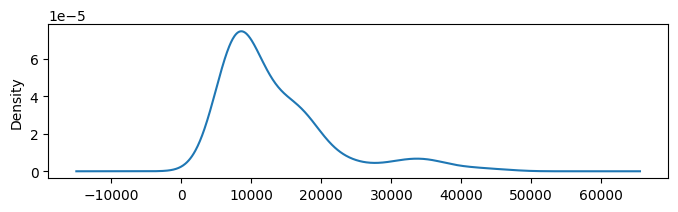

In [ ]:
df['preco'].plot(kind='kde', figsize=(8,2))


<Axes: >

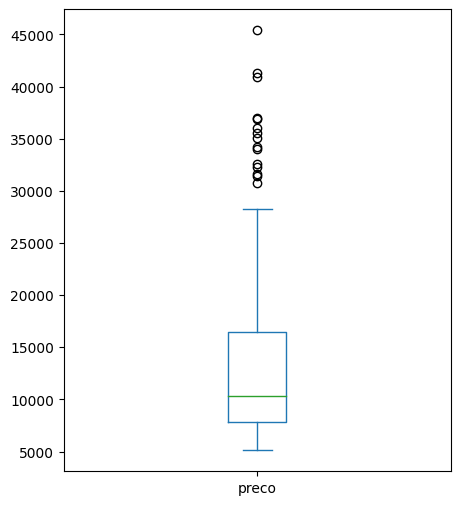

In [ ]:
df['preco'].plot(kind='box', figsize=(5,6))

In [ ]:
df["preco"].agg(["min","mean","median","max","std"]).to_frame().T

,min,mean,median,max,std
preco,5118.0,13276.710571,10295.0,45400.0,7988.852332


**Insights**
1. Podemos observar claramente que há uma diferença significativa entre **média e valor mediano**.
2. Também podemos perceber que a metade dos **preços de carro está abaixo de 10.000**.



---

## 5.2. Analisando o número total de carros vendido por fabricante

<Axes: >

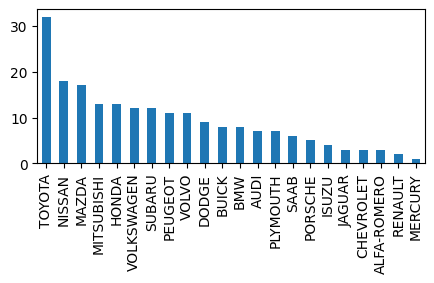

In [ ]:
plt.figure(figsize=(5,2))
df["fabricante"].value_counts().plot(kind='bar')



**Insights**
1. A empresa **Toyota** vendeu o maior número de carros.
2. Portanto, podemos dizer que a **Toyota** é o tipo de empresa preferida dos clientes.
3. **Mercury** ou **renault** estão tendo pontos de dados muito baixos. Portanto, não podemos fazer nenhuma inferência sobre as montadoras menos vendidas.

In [ ]:
df[(df["fabricante"]=="MERCURY") |  (df["fabricante"]=="RENAULT") ]

,carro_id,seguranca,fabricante,modelo,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,localizacao_motor,...,tamanho_motor,sistema_combustivel,diametro_cilindro,distancia_pistao,taxa_compressao,potencia,rpm_max,rpm_cidade,rpm_estrada,preco
75,76,1,MERCURY,COUGAR,gas,turbo,two,hatchback,rwd,front,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0
130,131,0,RENAULT,12TL,gas,std,four,wagon,fwd,front,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0
131,132,2,RENAULT,5 GTL,gas,std,two,hatchback,fwd,front,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9895.0


##5.3 Analisando preço por marca



<Axes: xlabel='fabricante'>

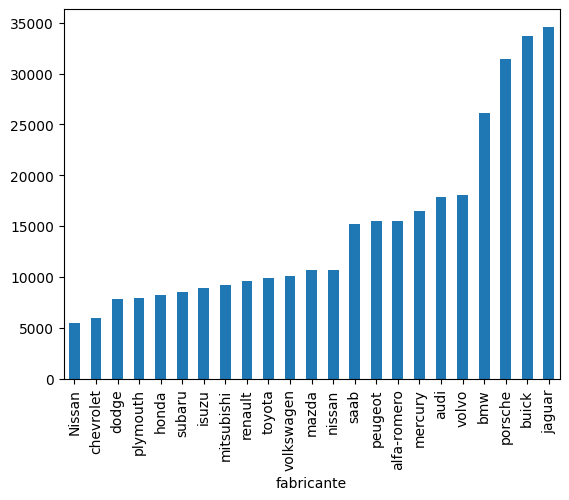

In [ ]:
df.groupby('fabricante')['preco'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='fabricante'>

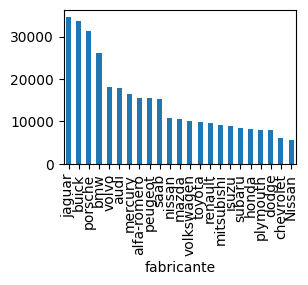

In [ ]:
df.groupby('fabricante')['preco'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(3,2))

**Insights**
1. **Jaguar** e **buick** parecem ter os carros da faixa de preço mais alta.
2. As empresas de automóveis como **Nisaan**, **Renault** e **Mercury** têm apenas um ou dois pontos de dados. Portanto, não podemos fazer nenhuma inferência relacionada às empresas de automóveis da faixa de preço mais baixa.

**Seleção de Atributos**
- fabricante


##5.4.Analisando o Atributo Tipo de Combustível

Vamos iniciar criando uma função utilitária, para imprimir os gráficos de todos os atributos categóricos - string.

In [ ]:
def imprime_graficos(atributo):
  fig, a = plt.subplots(1,2, figsize=(8,2))
  #a - é um array of objetos de eixo
  df[atributo].value_counts().plot(kind='bar', ax=a[0], subplots=True)
  df.groupby(atributo)['preco'].mean().plot(kind='bar', ax=a[1], subplots=True)

**Agora sim vamos partir para a análise do tipo de combustível.**

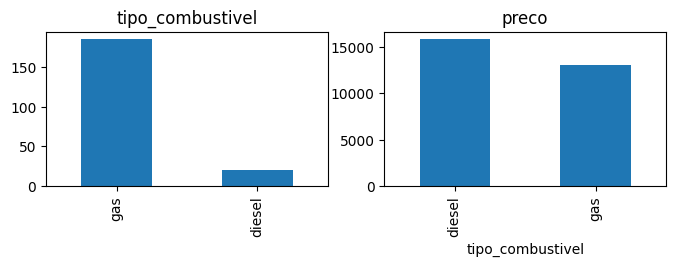

In [ ]:
imprime_graficos('tipo_combustivel')

**Insights**
1. Podemos perceber claramente que **Carros com sistema de combustível a gasolina** são mais vendidos.
4. A partir do terceiro gráfico podemos perceber que **o preço médio dos carros a gasolina é inferior ao dos carros a diesel**. Assim podemos dizer que os clientes preferem os carros que consomem menos preço em combustíveis.

**Seleção de Atributos**
- fabricante, tipo_combustivel

---

##5.5 Analisando o Atributo Aspiracao

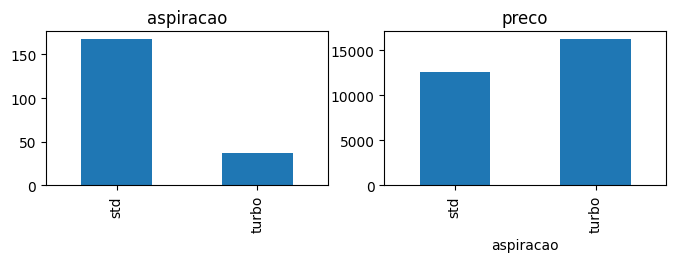

In [ ]:
imprime_graficos('aspiracao')

**Insights**
1. Carros aspirados são muito vendidos quando comparados com carros Turbo que, por sua vez, têm faixa de preço mais alta.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao


---

##5.6. Analisando o Atributo Número de Portas



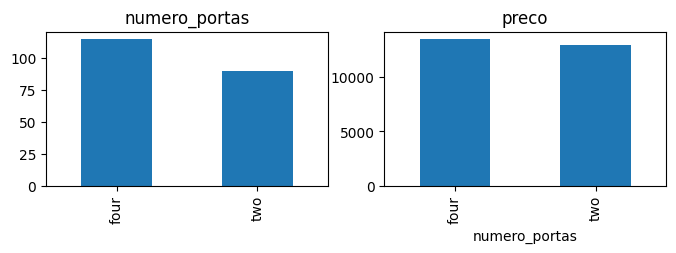

In [ ]:
imprime_graficos("numero_portas")

**Insights**
1. Carros com **Quatro Portas** são mais vendidos. Mas não há uma grande diferença entre as vendas de carros com **quatro portas** e **duas portas**.
2. Carros com **Quatro Portas** são um pouco mais caros quando comparamos o preço médio de carros com **duas portas** ou **quatro portas** - a categoria de números de porta não está afetando muito o preço.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas

##5.7. Analisando o Atributo Carroceria




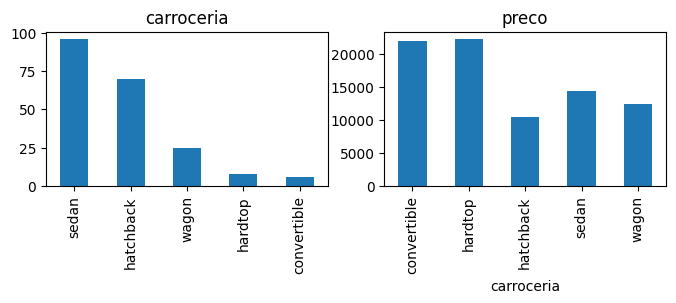

In [ ]:
imprime_graficos("carroceria")


**Insights**
1. Os carros com tipo de carroceria **sedan** são mais vendidos, seguidos por **hatchback**.
2. Carros com carroceria **Sedan** são o terceiro carro mais caro. Mas ainda está tendo o maior número de vendas de carros. Portanto, podemos dizer que os clientes preferem **carros de faixa de preço médio**.
3. Carros com tipo de carroceria **convertible** ou **hardtop** são menos vendidos porque são os mais caros
4. Carros com tipo de carroceria **Hardtop** são os carros mais caros, seguidos por **convertible**.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria


#Atividade III
- Realize a plotagem dos gráficos de barra e análise dos atributos Tração, Tipo de Motor, Número de Cilindros, Sitema de Combustível e Segurança.




---

##5.8. Analisando o Atributo Tração



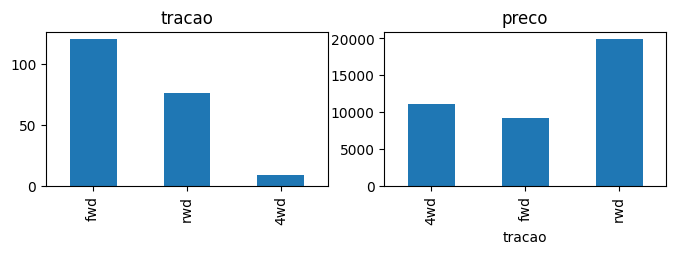

In [ ]:
imprime_graficos("tracao")


**Insights**
1. A maioria dos carros vendidos tem **Tração dianteira (FWD)** seguida de **Tração traseira (RWD)**.
2. Carros com **tração traseira** são em sua maioria carros caros. Mas os carros com **Tração dianteira** são os mais baratos.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao

---

##5.9. Analisando o Atributo Localização Do Motor

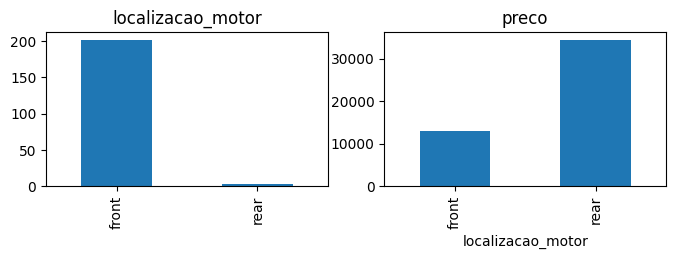

In [ ]:
imprime_graficos("localizacao_motor")

**Insights**
1. A maioria dos carros tem a localização do motor **na frente**.
2. Existem **apenas 3 pontos de dados para a categoria traseira**, portanto, não podemos inferir o preço do carro quando comparado com a localização do motor.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao

##5.10. Analisando o Atributo Tipo De Motor

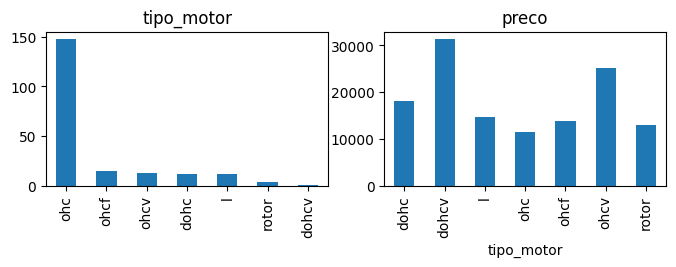

In [ ]:
imprime_graficos("tipo_motor")

**Insights**
1. Carros com **Overhead Camshaft (OHC)** são os mais vendidos.
2. Existem poucos ponros de dados para motores do tipo  **dohcv** & **rotor**, então vamos considerar os carros com motores do tipo **ohcv** como os mais caros.
3. Carros com motor do tipo **Overhead Camshaft (OHC)** são os menos caros.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao, tipo_motor

##5.11. Analisando o Atributo Número de Cilindros



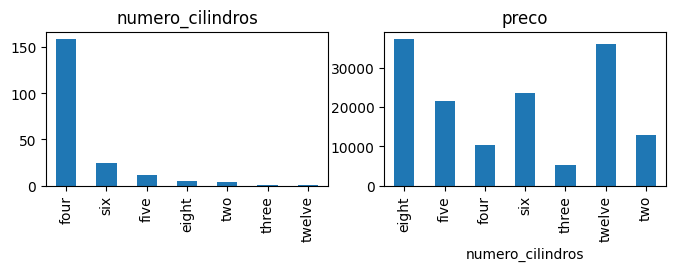

In [ ]:
imprime_graficos("numero_cilindros")

**Insights**
1. A maioria dos carros tem **Quatro** cilindros, seguidos por carros com **seis** cilindros.
2. Há apenas um ponto de dados para cada carro com **Três** e **Doze** cilindros, por isso, serão desconsiderados.
3. Carros com **oito** cilindros são os carros mais caros, seguidos por **seis** cilindros.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao, tipo_motor, numero_cilindros

##5.12. Analisando o Atributo Sistema de Combustivel

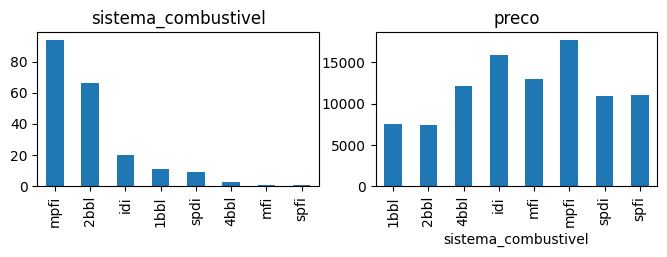

In [ ]:
imprime_graficos("sistema_combustivel")

**Insight**
1. A maioria dos carros tem sistemas de combustível **mpfi** e **2bbl**.
2. Os carros com sistema de combustível **mpfi** são os carros caros, seguidos pelos carros com sistema de combustível **idi**.
3. Há apenas um ponto de dados para cada carro com sistema de combustível **mfi** e **spfi**. Assim, não podemos fazer qualquer outra inferência.


**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao, tipo_motor, numero_cilindros, sistema_combustivel

##5.13. Analisando o Atributo Segurança

1. O **symboling** representa o grau em que o carro é mais arriscado do que seu preço sugere.
2. **Varia de -3 a +3**, com valores negativos mais altos indicando maior risco e valores positivos mais altos indicando menor risco.
3. Em outras palavras, um carro com um symboling de **-3** é considerado **mais arriscado** do que um carro com um símbolo de +3 e provavelmente terá um preço **menor** como resultado .

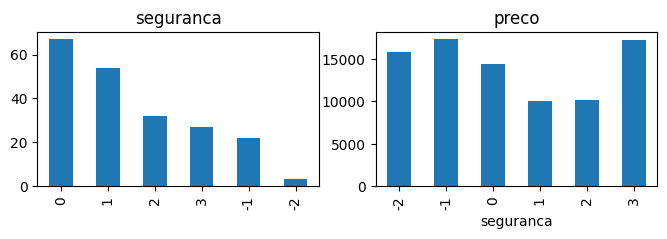

In [ ]:
imprime_graficos("seguranca")

**Insights**
1. Podemos observar claramente que carros com os símbolos **0** ou **1** são os preferidos.
2. Também podemos observar que os símbolos **-1, 0, 3** são caros.

**Seleção de Atributos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao, tipo_motor, numero_cilindros, seguranca

##5.14. Análise de Variáveis Numéricas (Quantitativas)

**Criando a função de impressão dos gráficos de dispersão**

In [ ]:
def imprime_scatter(colunas, qtd_colunas = 3):

    num_colunas = len(colunas)
    if num_colunas % qtd_colunas > 0:
        num_linhas = int(num_colunas/qtd_colunas) + 1
    else:
        num_linhas = int(num_colunas/qtd_colunas)
    altura_figura = 4 * num_linhas
    fig, a = plt.subplots(num_linhas,qtd_colunas, figsize=(12,altura_figura))
    posicao = 0
    for coluna in colunas:
        posicao_linha = posicao % qtd_colunas
        posicao_coluna = int(posicao / qtd_colunas)
        df[[coluna, 'preco']].plot(kind='scatter', x = coluna, y = 'preco',
                                ax=a[posicao_coluna][posicao_linha],
                                subplots=True)

        posicao += 1



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carro_id                205 non-null    int64  
 1   seguranca               205 non-null    int64  
 2   fabricante              205 non-null    object 
 3   modelo                  205 non-null    object 
 4   tipo_combustivel        205 non-null    object 
 5   aspiracao               205 non-null    object 
 6   numero_portas           205 non-null    object 
 7   carroceria              205 non-null    object 
 8   tracao                  205 non-null    object 
 9   localizacao_motor       205 non-null    object 
 10  distancia_entre_ eixos  205 non-null    float64
 11  comprimento_veiculo     205 non-null    float64
 12  largura_veiculo         205 non-null    float64
 13  altura_veiculo          205 non-null    float64
 14  peso_veiculo            205 non-null    in

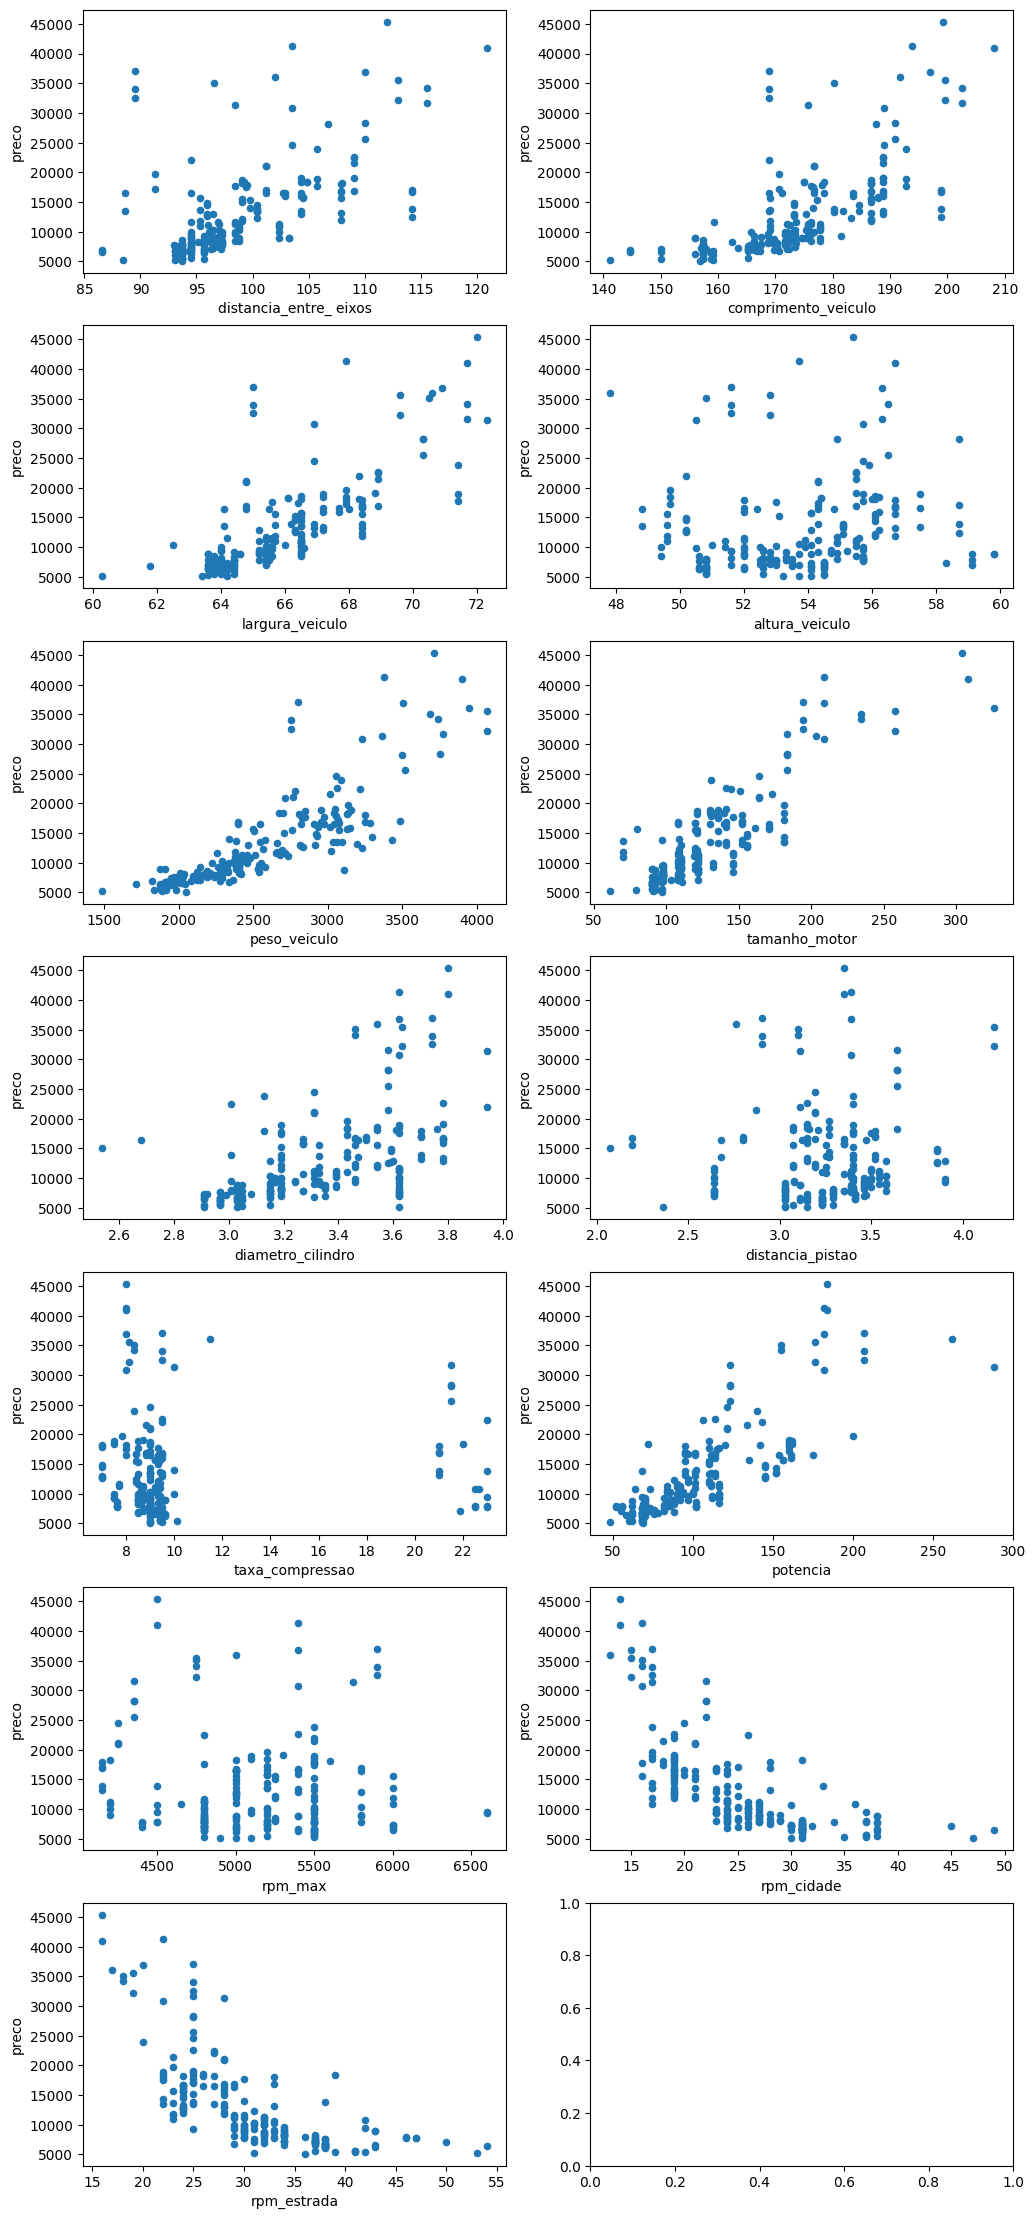

In [ ]:
imprime_scatter(["distancia_entre_ eixos","comprimento_veiculo","largura_veiculo","altura_veiculo",
                 "peso_veiculo","tamanho_motor","diametro_cilindro","distancia_pistao","taxa_compressao", "potencia",
                 "rpm_max", "rpm_cidade", "rpm_estrada"], qtd_colunas = 2)

**Insights**
1. Os atributos **largura_veiculo**, **comprimento_veiculo**, **distancia_entre_eixos**, **peso_veiculo**, **tamanho_motor**, **potencia** são altamente correlacionadas com o preço, vez que uma aumento nestas variáveis levam a um aumento do preço

2. Apesar de ter alguma dispersão, peecebe-se uma tendência leve de aumento de preço com aumento das variáveis **diametro_cilindro**

3. Os atributos **rpm_cidade** e **rpm_estrada** apresentam correlação negativa, ou seja, quando há uma redução do seu valor, há um aumento de preço.

4. Os pontos de dados de **altura_veiculo**, **distancia_pistao** **taxa_compressao**, **rpm_max** estão bem distribuidos, o que impede que se faça uma inferência - estas variáveis podem ser eliminadas.


**Seleção de Atributos**
- largura_veiculo, comprimento_veiculo, distancia_entre_eixos, peso_veiculo, tamanho_motor, potencia, diametro_cilindro, rpm_cidade, rpm_estrada



## 5.15. Lista de todos os atributos úteis

**Seleção de Atributos Numéricos**
- largura_veiculo, comprimento_veiculo, distancia_entre_eixos, peso_veiculo, tamanho_motor, potencia, diametro_cilindro, rpm_cidade, rpm_estrada

**Seleção de Atributos Categóricos**
- fabricante, tipo_combustivel, aspiracao, numero_portas, carroceria, tracao, tipo_motor, numero_cilindros, seguranca.

**Seleção de Atributo Alvo**
- preco

# 6. Criar e Salvar o Novo Conjunto com Atributos Selecionados

In [ ]:
new_df = df[['largura_veiculo', 'comprimento_veiculo', 'distancia_entre_ eixos', 'peso_veiculo', 'tamanho_motor', 'potencia',
             'diametro_cilindro', 'rpm_cidade', 'rpm_estrada','fabricante', 'tipo_combustivel', 'aspiracao', 'numero_portas',
             'carroceria', 'tracao', 'tipo_motor', 'numero_cilindros', 'seguranca', 'preco']]








In [ ]:
new_df.head(2)

,largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,fabricante,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,tipo_motor,numero_cilindros,seguranca,preco
0,64.1,168.8,88.6,2548,130,111,3.47,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,3,13495.0
1,64.1,168.8,88.6,2548,130,111,3.47,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,3,16500.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_df.to_csv('/content/drive/MyDrive/dados_veiculos.csv', index=False)

In [ ]:
!head -10 /content/drive/MyDrive/dados_veiculos.csv

largura_veiculo,comprimento_veiculo,distancia_entre_ eixos,peso_veiculo,tamanho_motor,potencia,diametro_cilindro,rpm_cidade,rpm_estrada,fabricante,tipo_combustivel,aspiracao,numero_portas,carroceria,tracao,tipo_motor,numero_cilindros,seguranca,preco
64.1,168.8,88.6,2548,130,111,3.47,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,3,13495.0
64.1,168.8,88.6,2548,130,111,3.47,21,27,alfa-romero,gas,std,two,convertible,rwd,dohc,four,3,16500.0
65.5,171.2,94.5,2823,152,154,2.68,19,26,alfa-romero,gas,std,two,hatchback,rwd,ohcv,six,1,16500.0
66.2,176.6,99.8,2337,109,102,3.19,24,30,audi,gas,std,four,sedan,fwd,ohc,four,2,13950.0
66.4,176.6,99.4,2824,136,115,3.19,18,22,audi,gas,std,four,sedan,4wd,ohc,five,2,17450.0
66.3,177.3,99.8,2507,136,110,3.19,19,25,audi,gas,std,two,sedan,fwd,ohc,five,2,15250.0
71.4,192.7,105.8,2844,136,110,3.19,19,25,audi,gas,std,four,sedan,fwd,ohc,five,1,17710.0
71.4,192.7,105.8,2954,136,110,3.19,19,25,audi,gas,std,four,wagon,fwd,ohc,five,1,18920.0
71.4,192.7,105.8,